# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [20]:
import matplotlib.pyplot as plt
import pandas

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

<img src="assets/bricks.jpg" width="60%">

In [40]:
colors_df = pandas.read_csv('data/colors.csv')
colors_df.nunique()
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


<div class="row">
<div class="column">
<img src="assets/lego_sets.png" alt="Snow" style="width:100%">
</div>
<div class="column">
<img src="assets/lego_themes.png" alt="Forest" style="width:100%">
</div>
</div>


In [22]:
sets_df = pandas.read_csv('data/sets.csv')
sets_df

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg
...,...,...,...,...,...,...
20827,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
20828,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
20829,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
20830,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [23]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pandas.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,5
...,...
2019,94
2020,99
2021,92


In [24]:
themes_by_year.rename(columns= {'theme_id': 'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,5
...,...
2019,94
2020,99
2021,92


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

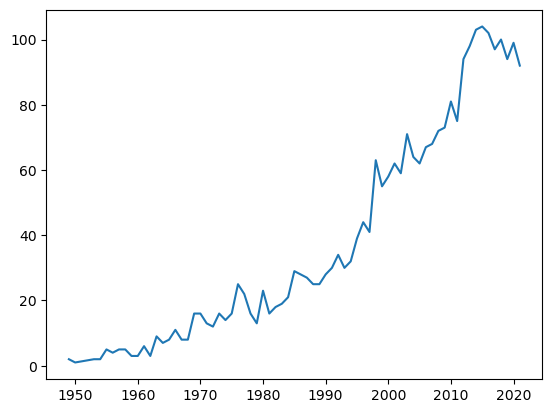

In [29]:
plt.plot(themes_by_year['nr_themes'][:-2])

### Line Charts with Two Seperate Axes

KeyError: 'num_parts'

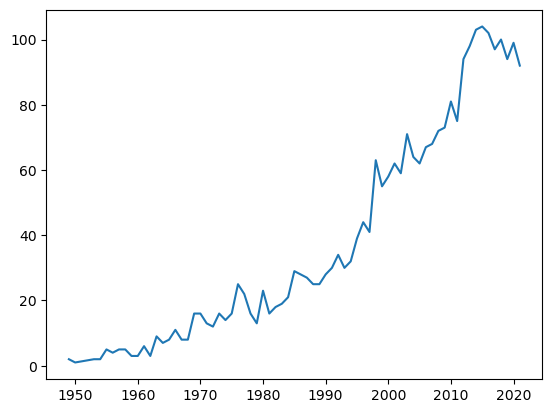

In [27]:
plt.plot(themes_by_year['nr_themes'][:-2])

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

,set_num,name,year,num_parts,img_url
theme_id,,,,,
1,360,360,360,360,360
3,18,18,18,18,18
4,39,39,39,39,39
16,31,31,31,31,31
17,5,5,5,5,5
...,...,...,...,...,...
741,32,32,32,32,32
742,283,283,283,283,283
743,16,16,16,16,16


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

set_num      862
name         862
year         862
num_parts    862
img_url      862
Name: 158, dtype: int64

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [76]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count

158    862
503    679
497    612
494    526
501    481
      ... 
241      1
215      1
210      1
415      1
414      1
Name: theme_id, Length: 454, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets/rebrickable_schema.png" alt="Schema">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [55]:
themes_df = pandas.read_csv('data/themes.csv')
themes_df[themes_df['name'] == "Star Wars"]


,id,name,parent_id
5,18,Star Wars,1.0
75,158,Star Wars,NaN
96,209,Star Wars,207.0
126,261,Star Wars,258.0


In [75]:
sets_df[sets_df['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts,img_url
14469,75023-1,Star Wars Advent Calendar 2013,2013,209,254,https://cdn.rebrickable.com/media/sets/75023-1...
14502,75056-1,Star Wars Advent Calendar 2014,2014,209,275,https://cdn.rebrickable.com/media/sets/75056-1...
14536,75097-1,Star Wars Advent Calendar 2015,2015,209,291,https://cdn.rebrickable.com/media/sets/75097-1...
14587,75146-1,Star Wars Advent Calendar 2016,2016,209,282,https://cdn.rebrickable.com/media/sets/75146-1...
14629,75184-1,Star Wars Advent Calendar 2017,2017,209,309,https://cdn.rebrickable.com/media/sets/75184-1...
14662,75213-1,Star Wars Advent Calendar 2018,2018,209,307,https://cdn.rebrickable.com/media/sets/75213-1...
14701,75245-1,Star Wars Advent Calendar 2019,2019,209,280,https://cdn.rebrickable.com/media/sets/75245-1...
14737,75279-1,Star Wars Advent Calendar 2020,2020,209,311,https://cdn.rebrickable.com/media/sets/75279-1...
14763,75307-1,Star Wars Advent Calendar 2021,2021,209,336,https://cdn.rebrickable.com/media/sets/75307-1...
14800,75340-1,Star Wars Advent Calendar 2022,2022,209,329,https://cdn.rebrickable.com/media/sets/75340-1...


In [58]:
sets_df[sets_df['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts,img_url
11818,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
15756,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
15763,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
15774,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
15801,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
15802,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
15803,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
15804,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
15816,8011-1,Jango Fett,2002,18,425,https://cdn.rebrickable.com/media/sets/8011-1.jpg
15819,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


### Merging (i.e., Combining) DataFrames based on a Key


In [79]:
set_theme_count = pandas.DataFrame({'id':set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count

,id,set_count
0,158,862
1,503,679
2,497,612
3,494,526
4,501,481
...,...,...
449,241,1
450,215,1
451,210,1
452,415,1


In [83]:
merged_df = pandas.merge(set_theme_count, themes_df, on='id')[:10]
merged_df

,id,set_count,name,parent_id
0,158,862,Star Wars,NaN
1,503,679,Key Chain,501.0
2,497,612,Books,NaN
3,494,526,Friends,NaN
4,501,481,Gear,NaN
5,435,472,Ninjago,NaN
6,324,444,Bionicle,NaN
7,67,410,Classic Town,50.0
8,505,383,Basic Set,504.0
9,1,360,Technic,NaN


<BarContainer object of 10 artists>

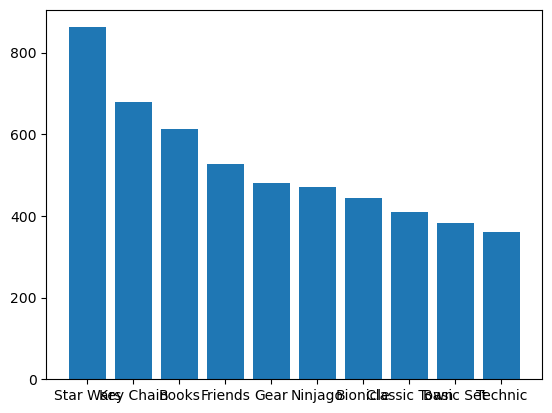

In [84]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

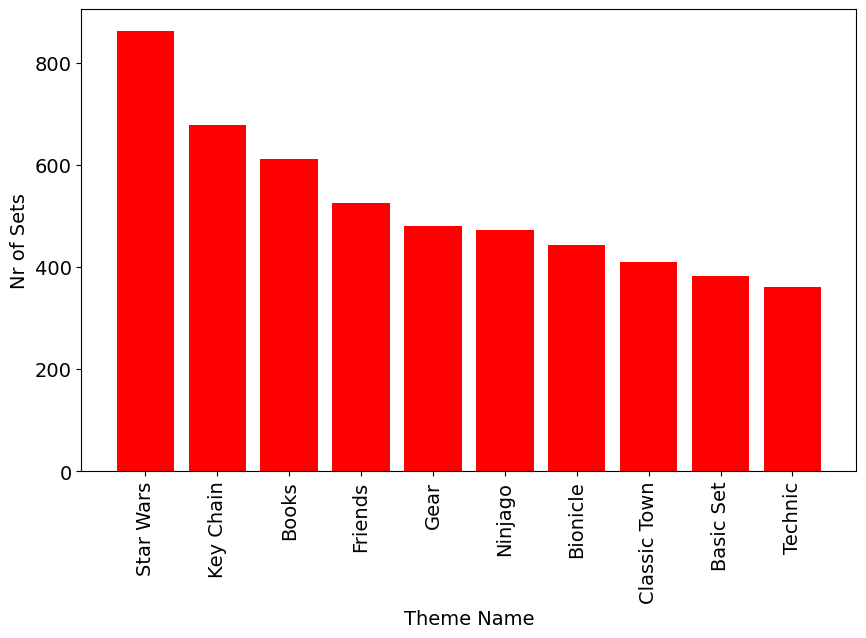

In [87]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10], color='red')